Question 9 -

Write a program to read the data from the following link, perform data analysis and answer the following questions

Note -

1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type

In [ ]:
# import urllib library
from urllib.request import urlopen
# import json library
import json  
#import datetime library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read csv file from link
veh_df = pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD")

In [ ]:
veh_df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [ ]:
# Checking value for eclean alternative fuel vehicle eligibility column
veh_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [ ]:
cars_not_clean_alt_fuel = veh_df[veh_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range'].filter(items=['Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
cars_not_clean_alt_fuel

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
15,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
...,...,...,...,...
130377,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
130385,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
130390,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range
130407,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range


● Get all TESLA cars with the model year, and model type made in Bothell City.

In [ ]:
tesla_made_bothell = veh_df[(veh_df['Make'] == 'TESLA') & (veh_df['City'] == 'Bothell')].filter(items=['Make','Model','Model Year','Electric Vehicle Type','City'])
tesla_made_bothell

,Make,Model,Model Year,Electric Vehicle Type,City
39,TESLA,MODEL 3,2020,Battery Electric Vehicle (BEV),Bothell
217,TESLA,MODEL 3,2022,Battery Electric Vehicle (BEV),Bothell
218,TESLA,MODEL Y,2022,Battery Electric Vehicle (BEV),Bothell
222,TESLA,MODEL 3,2018,Battery Electric Vehicle (BEV),Bothell
292,TESLA,MODEL X,2017,Battery Electric Vehicle (BEV),Bothell
...,...,...,...,...,...
129778,TESLA,MODEL 3,2019,Battery Electric Vehicle (BEV),Bothell
129954,TESLA,MODEL 3,2021,Battery Electric Vehicle (BEV),Bothell
129976,TESLA,MODEL S,2014,Battery Electric Vehicle (BEV),Bothell
130295,TESLA,MODEL 3,2022,Battery Electric Vehicle (BEV),Bothell


● Get all the cars that have an electric range of more than 100, and were made after 2015

In [ ]:
cars_aft_2015_er_gt_100 = veh_df[(veh_df['Electric Range'] > 100) & (veh_df['Model Year'] > 2015)]
cars_aft_2015_er_gt_100

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


● Draw plots to show the distribution between city and electric vehicle type

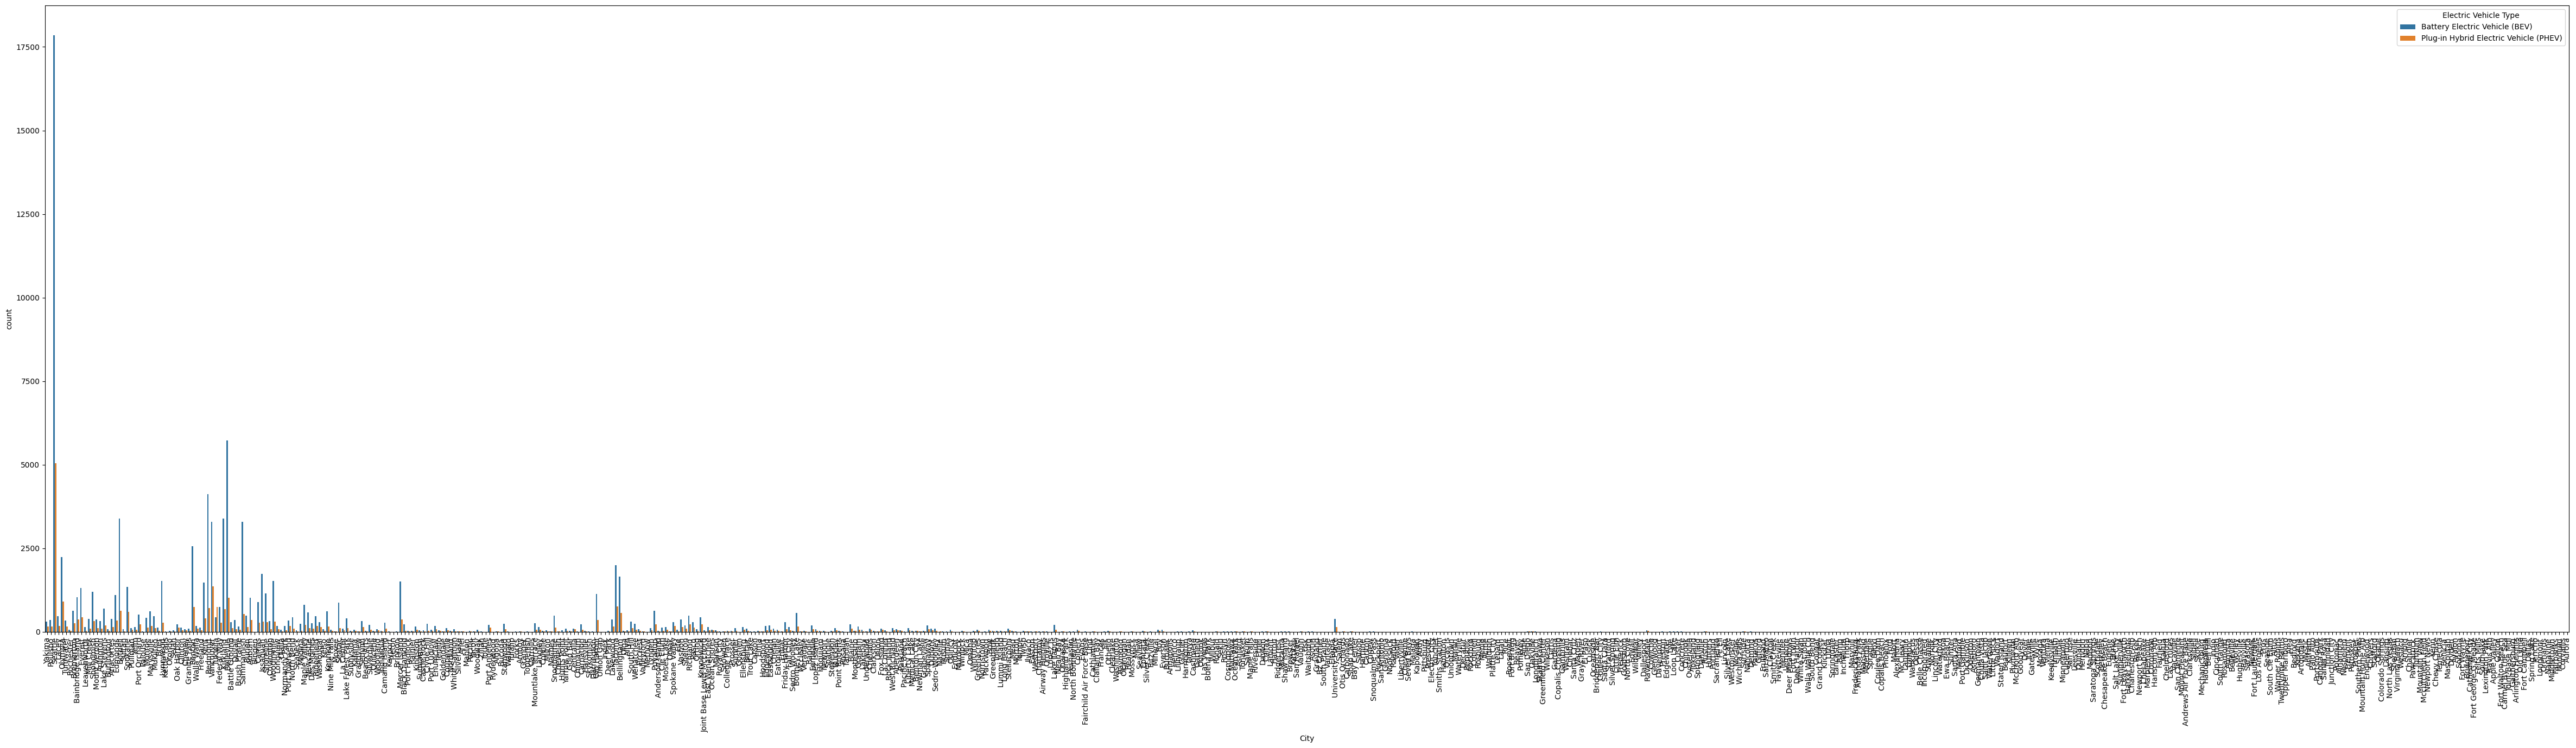

In [ ]:
# plt.scatter(veh_df['City'], veh_df['Electric Vehicle Type'], c ="blue")
import seaborn as sns

plt.figure(figsize=(60, 15))
# count plot 
sns.countplot(x = veh_df['City'], hue = veh_df['Electric Vehicle Type'], data = veh_df)
plt.xticks(rotation=90)
# Show the plot
plt.show()